# Introduction

## There are many predictors to a car's saleprice. Can we use a combination of several of the stronger predictors to build an stronger model? In this project, we compare two types of machine learning, OLS(linear regression) or Recursive Feature Elimination (RFE) to find out which model can best minimize error as we add predictors.

### Flow of the procedure:
1) Looking at data set

2) Cleaning the data set

3) Identify strong numeric predictors (using heatmap)

4) Identify strong categorical predictors (using boxplots)

5) Use Linear Regression for any one of the strong predictor

6) Apply Ordinary Least Squares by adding 2 other strong predictors to get a more accurate model

7) Recursive Feature Elimination to find the strongest possible model


# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

sb.set() # set the default Seaborn style for graphics
%matplotlib inline

In [ ]:
car = pd.read_csv('car.csv')

# Looking at the data set


In [ ]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Cleaning data set

Removing car ID as it is not needed for predictions

In [ ]:
car = car.drop('car_ID',axis=1)

In [ ]:
car.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Symboling is presented as a numeric variable, but it should be categorical

In [ ]:
car['symboling'] = car['symboling'].astype(str)

Check for duplicates in data set

In [ ]:
car.loc[car.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


No duplicates found

In [ ]:
cat_cols = car.select_dtypes(include=['object']).columns
num_cols = car.select_dtypes(exclude=['object']).columns
car_cat = car[cat_cols]
car_num = car[num_cols]


Splitting categorical and numeric data to visualize data

# Identify Strong Numeric Predictors

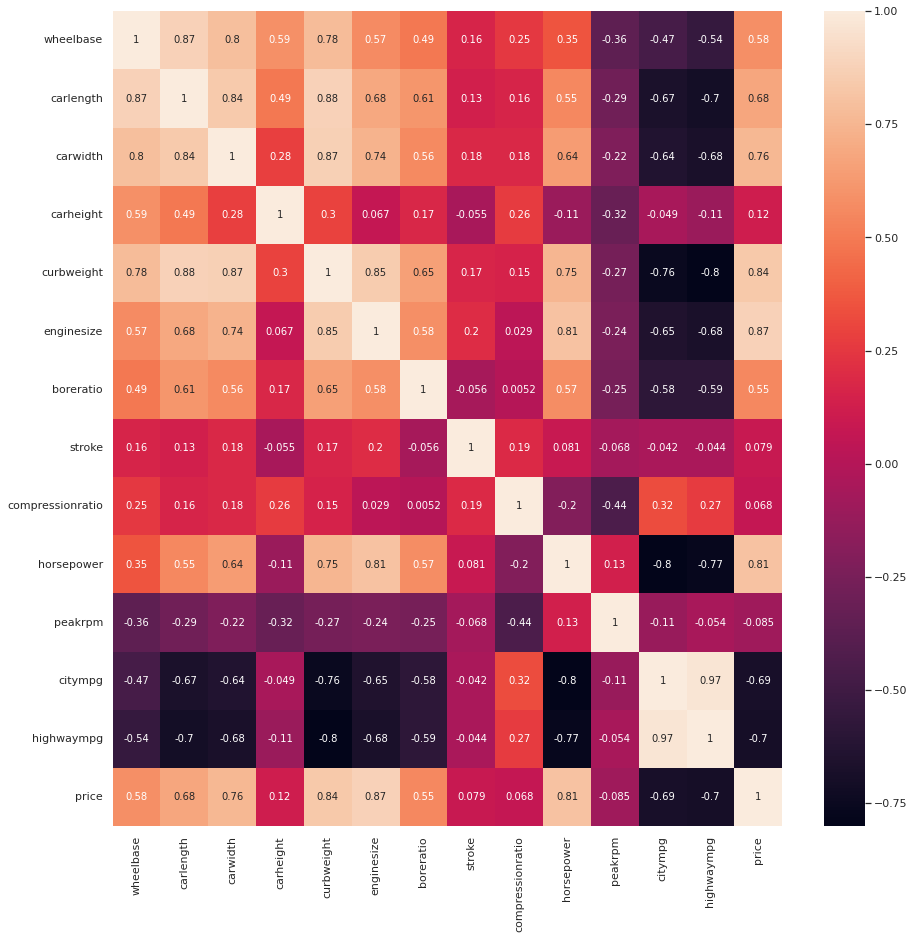

In [ ]:
plt.figure(figsize=(15,15))
sb.heatmap(car.corr(),annot=True);

From the Heatmap above, we identify that enginesize, curbweight and horsepower have relatively higher correlation to price.

Carwidth, carlength, boreration, citympg and highwaympg are also useful in predicting price and have medium correlation.

We also identify that stroke, compression ratio, peakRPM and carheight have little correlation to price. We will likely not use these variables for prediction



# Identify categorical predictors

In [ ]:
car_cat.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


We do not use Symboling and Carname as predictors as they affect price through business factors that we do not have access to

We plot boxplots of the rest of the categorical variables against price

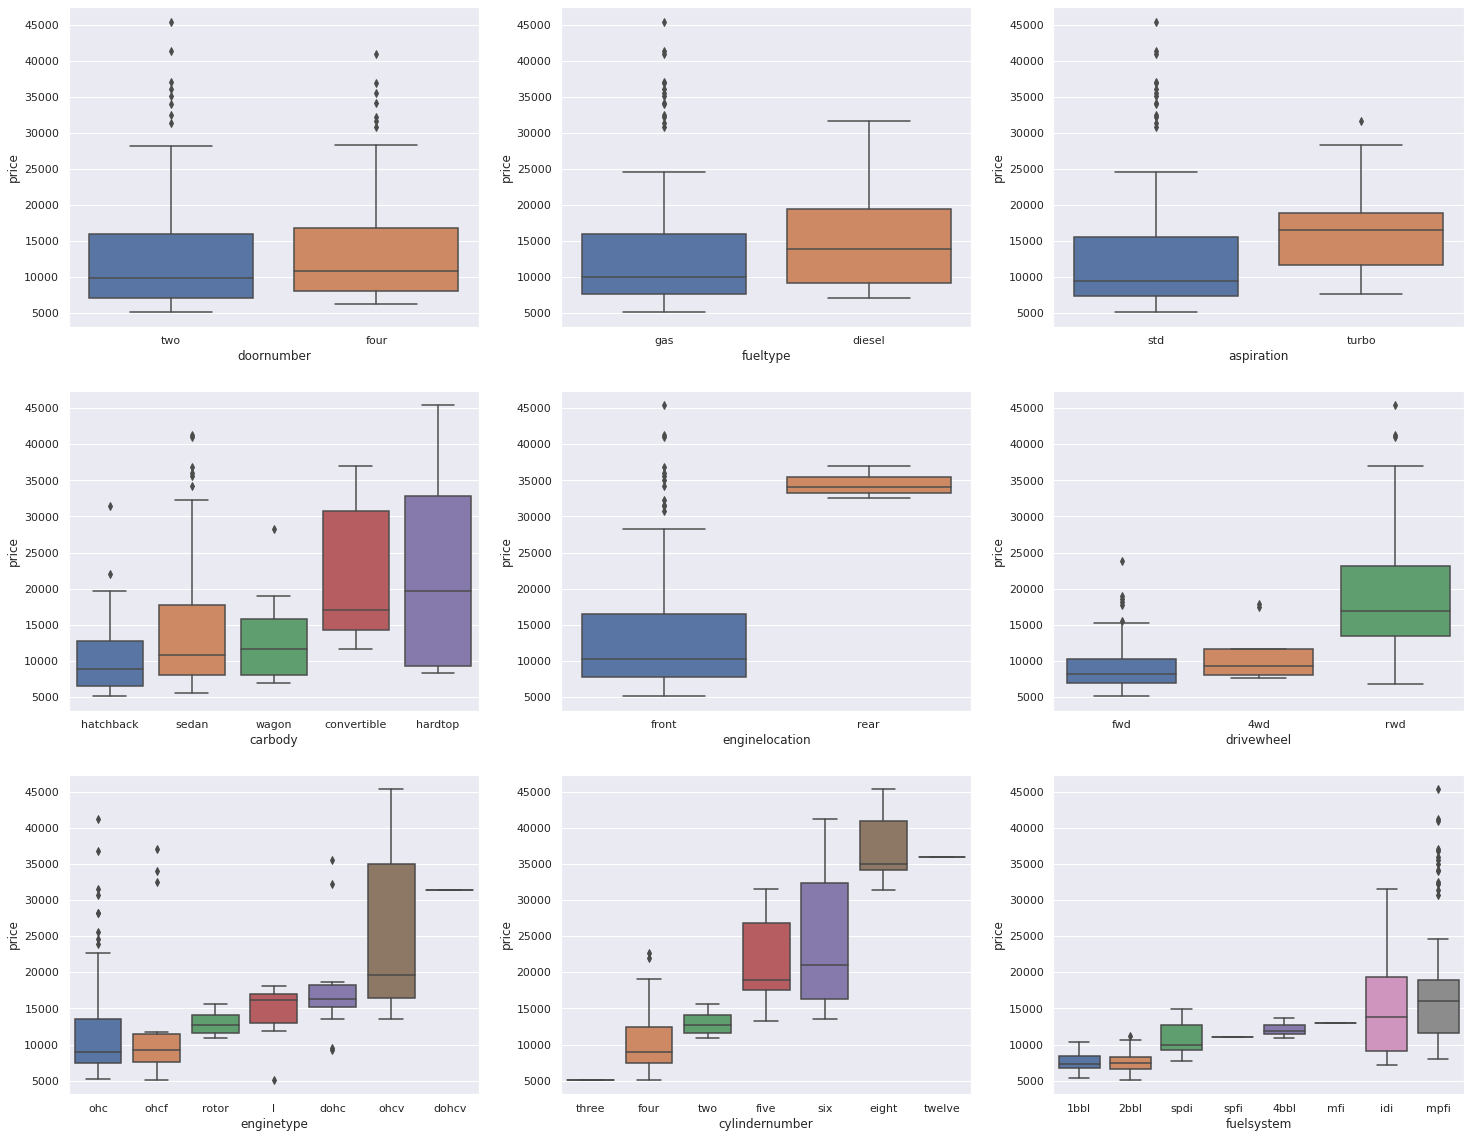

In [ ]:
plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sb.boxplot(x = 'doornumber', y = 'price', data = car, order = car.groupby('doornumber')['price'].median().sort_values().index)
plt.subplot(3,3,2)
sb.boxplot(x = 'fueltype', y = 'price', data = car, order = car.groupby('fueltype')['price'].median().sort_values().index)
plt.subplot(3,3,3)
sb.boxplot(x = 'aspiration', y = 'price', data = car, order = car.groupby('aspiration')['price'].median().sort_values().index)
plt.subplot(3,3,4)
sb.boxplot(x = 'carbody', y = 'price', data = car, order = car.groupby('carbody')['price'].median().sort_values().index)
plt.subplot(3,3,5)
sb.boxplot(x = 'enginelocation', y = 'price', data = car, order = car.groupby('enginelocation')['price'].median().sort_values().index)
plt.subplot(3,3,6)
sb.boxplot(x = 'drivewheel', y = 'price', data = car, order = car.groupby('drivewheel')['price'].median().sort_values().index)
plt.subplot(3,3,7)
sb.boxplot(x = 'enginetype', y = 'price', data = car, order = car.groupby('enginetype')['price'].median().sort_values().index)
plt.subplot(3,3,8)
sb.boxplot(x = 'cylindernumber', y = 'price', data = car, order = car.groupby('cylindernumber')['price'].median().sort_values().index)
plt.subplot(3,3,9)
sb.boxplot(x = 'fuelsystem', y = 'price', data = car, order = car.groupby('fuelsystem')['price'].median().sort_values().index)
plt.show()

Based on the box plots above, we can see that door number has not much affect on price.

Cars that use diesal have an on average higher price than cars that use gas. But there some outliers of extremely expensive cars that use gas.

Hardtop and convertible carbodies have a significantly higher price on average than other car body types.

Cars with engine at the rear have extremely high prices.

OHCV engines seem to have the highest average price out of all engine types.

Cylinder number seems to rise with price.

Rear wheel drive cars seem to have higher price on average.

Cars with turbo tend to have higher prices compared to standard.

MPFI fuel systems has the highest average price.

# Preparing Data Set

Firstly, we take all the variables that have significant correlations to price(numeric and categorical) and group them together

For categorical variables, we choose carbody, fueltype, cylindernumber, drivewheel and enginetype.

For numerical variables, we choose enginesize, curbweight, horsepower, carwidth, carlength, citympg and highwaympg.

We modify the dataframe such that it only consists of the variables we choose

In [ ]:
sig_var = ['price', 'carbody','fueltype','cylindernumber','drivewheel','enginetype', 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'citympg', 'highwaympg']

In [ ]:
car = car[sig_var]

Then we want to convert categorical varaibles to numeric variables. We decided to use dummy variables and concat the variables into the data set at the end.

We have chosen a few select variables that we feel would be good predictors for price. Carbody, Fuel type, Number of cylinders, engine type, and drive wheel.

We concat the categorical variables first into cat_vars



In [ ]:
cat_vars = ['carbody','fueltype','cylindernumber','drivewheel','enginetype']

In [ ]:
new_num=pd.get_dummies(car[cat_vars])
new_num.shape

(205, 24)

In [ ]:
new_num=pd.get_dummies(car[cat_vars], drop_first = True)
new_num.shape

(205, 19)

Add dummies into dataframe

In [ ]:
car = pd.concat([car, new_num], axis = 1)

Remove original categorical variables

In [ ]:
car.drop( cat_vars, axis = 1, inplace = True)
car

,price,enginesize,curbweight,horsepower,carwidth,carlength,citympg,highwaympg,carbody_hardtop,carbody_hatchback,...,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,13495.0,130,2548,111,64.1,168.8,21,27,0,0,...,0,0,0,1,0,0,0,0,0,0
1,16500.0,130,2548,111,64.1,168.8,21,27,0,0,...,0,0,0,1,0,0,0,0,0,0
2,16500.0,152,2823,154,65.5,171.2,19,26,0,1,...,0,0,0,1,0,0,0,0,1,0
3,13950.0,109,2337,102,66.2,176.6,24,30,0,0,...,0,0,1,0,0,0,1,0,0,0
4,17450.0,136,2824,115,66.4,176.6,18,22,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,141,2952,114,68.9,188.8,23,28,0,0,...,0,0,0,1,0,0,1,0,0,0
201,19045.0,141,3049,160,68.8,188.8,19,25,0,0,...,0,0,0,1,0,0,1,0,0,0
202,21485.0,173,3012,134,68.9,188.8,18,23,0,0,...,0,0,0,1,0,0,0,0,1,0
203,22470.0,145,3217,106,68.9,188.8,26,27,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
train, test = train_test_split(car, test_size=0.2)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
sig_num = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'citympg', 'highwaympg']

In [ ]:
import warnings
warnings.filterwarnings("ignore")

car[sig_num] = scaler.fit_transform(car[sig_num])

# Linear regression

We plan to use numerical variables that have high correlation to predict price of car.

In this case, we have decided to use Horsepower as the variable to conduct Linear Regression

In [ ]:
hp_train = pd.DataFrame(train['horsepower'])
print("Data type : ", type(hp_train))
print("Data dims : ", hp_train.size)
hp_test = pd.DataFrame(test['horsepower'])
print("Data type : ", type(hp_test))
print("Data dims : ", hp_test.size)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  164
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  41


In [ ]:
p_train = pd.DataFrame(train['price'])
print("Data type : ", type(p_train))
print("Data dims : ", p_train.size)
p_test = pd.DataFrame(test['price'])
print("Data type : ", type(p_test))
print("Data dims : ", p_test.size)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  164
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  41


In [ ]:
linreg = LinearRegression()
linreg.fit(hp_train, p_train)

LinearRegression()

In [ ]:
p_train_pred = linreg.predict(hp_test)

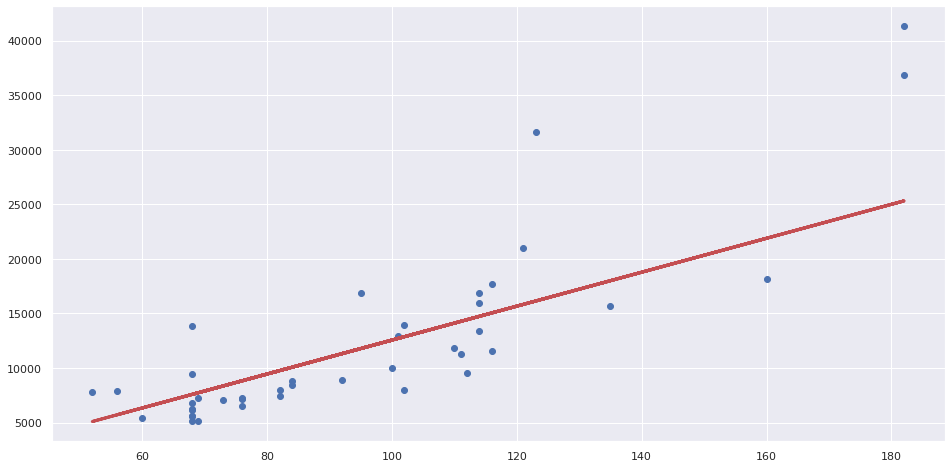

In [ ]:
f=plt.figure(figsize=(16,8))
plt.scatter(hp_test, p_test)
plt.plot(hp_test, p_train_pred, color='r',linewidth = 3)
plt.show()

In [ ]:
linreg.score(hp_train, p_train)

0.6470418855421565

In [ ]:
linreg.score(hp_test, p_test)

0.6595956027103903

Notice that the R-squared value obtained is 0.647 for train set and 0.660 for the test set. 

Since we have so many variables, we can improve on this. So let's go ahead and add another highly correlated variable, curbweight.

# Ordinary Least Squares

We make use of ordinary least squares to minimize the prediction error by adding curbweight as another predictor to go along horsepower.

We plan to add new predictors to improve train set accuracy first, we will use test set later after obtaining a stronger model

In [ ]:
jointDF1 = train[['horsepower','curbweight']]
jointDF1.describe()
# Add a constant
jointDF1c = sm.add_constant(jointDF1)
# Create a second fitted model
linreg2 = sm.OLS(p_train, jointDF1c).fit()

In [ ]:
linreg2.params

const        -15024.109069
horsepower       82.260922
curbweight        7.671705
dtype: float64

OLS recognizes that horsepower has a stronger correlation to price than curbweight, so they put more predicting weight on horsepower

In [ ]:
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     258.4
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           5.60e-51
Time:                        00:54:44   Log-Likelihood:                -1587.0
No. Observations:                 164   AIC:                             3180.
Df Residuals:                     161   BIC:                             3189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.502e+04   1603.628     -9.369      0.0

Now we have observed that the R-squared value for train set increased to 0.762. Let's try adding one more predictor, enginesize.

In [ ]:
jointDF2 = jointDF2 = train[['horsepower','curbweight','enginesize']]
# Add a constant
jointDF2c = sm.add_constant(jointDF2)
# Create a second fitted model
linreg3 = sm.OLS(p_train, jointDF2c).fit()
print(linreg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     231.1
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           6.27e-58
Time:                        00:54:44   Log-Likelihood:                -1567.6
No. Observations:                 164   AIC:                             3143.
Df Residuals:                     160   BIC:                             3156.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.224e+04   1491.094     -8.210      0.0

We have achieved a R-squared of 0.813 by manually picking the highly correlated variables.

By adding more variables we can improve R-squared even further but it’s going to take a while if we have to manually identify the stronger predictors from the heatmap. Lets try a different type of machine learning.

## Our model is improving as we increase the number of predictors, but how many predictors should we have to find the strongest model? 

## Now we shall use RFE to select the independent variables which accurately predicts the dependent variable price.



# Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 

Hence we make use of recursive feature elimination to find the most accurate set of predictors we can use to predict car price.

In [ ]:
X = car.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X = X.drop(['price'],axis=1)
Y = car['price']

Make use of RFE(Recursive feature elimination) with random forest to remove certain input variables that are less useful in predicting car price.

To speed things up, we decided to use RFE to select the top 15 features to predict price. The R squared score was extremely high, very close to 1. Now we will use these predictors on our test set.

In [ ]:
forest_bob = RandomForestRegressor()      
rfe = RFE(estimator = forest_bob, n_features_to_select=15, step=1)
rfe = rfe.fit(X, Y)
print('Top 15 features:',X.columns[rfe.support_])

Top 15 features: Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength',
       'citympg', 'highwaympg', 'carbody_hatchback', 'carbody_sedan',
       'fueltype_gas', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'drivewheel_rwd', 'enginetype_ohc'],
      dtype='object')


In [ ]:
rfe.score(X, Y)

0.9886951861158837

In [ ]:
best_var=list(X.columns[rfe.support_])

In [ ]:
best_X = X[best_var]

x_train,x_test,y_train,y_test = train_test_split(best_X, Y, random_state = 0)

In [ ]:
Random_forest = RandomForestRegressor(n_estimators = 15,
                              criterion = 'friedman_mse',
                              random_state = 20,
                              n_jobs = -1)
Random_forest.fit(x_train,y_train)
train_pred = Random_forest.predict(x_train)
test_pred = Random_forest.predict(x_test)


r2_score(y_test,test_pred)

0.90115890849632

Using RFE to identify the strongest 15 variables, we achieved a r score of 0.9 in predicting car price. 

We will now try to manually add the same 15 variables using OLS.

In [ ]:
jointDF3 = jointDF3 = train[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength',
       'citympg', 'highwaympg', 'carbody_hatchback', 'carbody_sedan',
       'fueltype_gas', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'drivewheel_rwd', 'enginetype_ohc']]
# Add a constant
jointDF3c = sm.add_constant(jointDF3)
# Create a second fitted model
linreg4 = sm.OLS(p_train, jointDF3c).fit()
print(linreg4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     67.16
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.93e-58
Time:                        01:31:29   Log-Likelihood:                -1536.4
No. Observations:                 164   AIC:                             3105.
Df Residuals:                     148   BIC:                             3154.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.415e+04   1

By using 15 variables to predict price by OLS, we achieved a R2 score of 0.872.


# Conclusion



The strongest numeric variables we identified are horsepower, curbweight and enginesize. For categorical varaibles, prominent ones we have identified are engine location and cylindernumber. For engine location, cars with engines at the rear are more highly priced. For cylinder number, in general cars with more cylinders are priced higher.

We can draw is that using more predictors will increase prediction accuracy of car price.

Comparing the accuracy of OLS and RFE using the same 15 variables, we conclude that RFE is the stronger model to predict price.